In [114]:
# KNN Classification
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns


In [115]:
data = pd.read_csv(r'D:\z Data Science\Assignment\Assignment\Assignment 14\glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [116]:
data.shape

(214, 10)

In [117]:
data.duplicated().sum()

1

In [118]:
data.drop_duplicates( keep = False, inplace = True)

In [119]:
data.shape

(212, 10)

In [8]:
X = data.drop('Type',axis=1).values
y = data['Type'].values

In [9]:
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64)

In [11]:
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

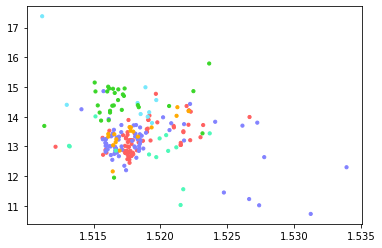

In [14]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

C:\Users\akshp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akshp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akshp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akshp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akshp\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.0% of the points

<AxesSubplot:xlabel='Na', ylabel='RI'>

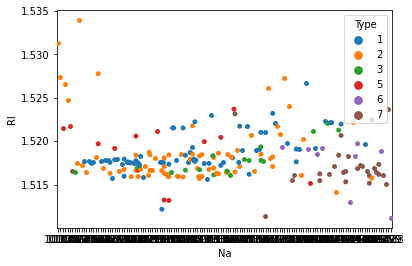

In [17]:
sns.swarmplot(x='Na',y='RI',data=data,hue='Type')


In [22]:
# creating training set, test set and checking shapes 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(y_test.shape))

Shape of X_Train:(128, 9)
Shape of y_Train:(128,)
Shape of X_Test:(86, 9)
Shape of y_Test:(86,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

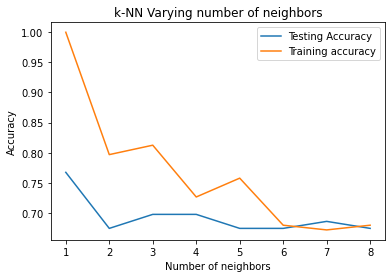

In [24]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k=1. So lets create a KNeighborsClassifier with number of neighbors as 1.

In [32]:
knn = KNeighborsClassifier(n_neighbors=1)

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [40]:
accuracy = knn.score(X_test,y_test) * 100
print("The accuracy is : "+str(accuracy))

The accuracy is : 76.74418604651163


In [35]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [36]:
y_pred = knn.predict(X_test)

In [43]:
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[24,  3,  1,  0,  0,  0],
       [ 6, 21,  1,  1,  1,  0],
       [ 5,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  3,  1],
       [ 0,  0,  0,  1,  0, 11]], dtype=int64)

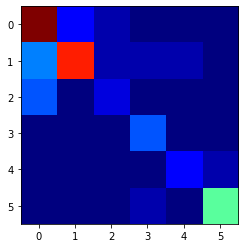

In [44]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
plt.imshow(cnf_matrix,cmap=plt.cm.jet)

<AxesSubplot:>

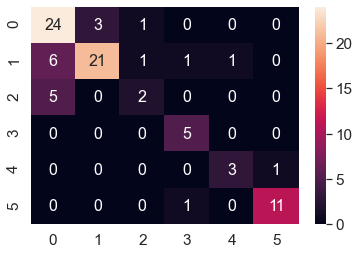

In [45]:
#visualizing the confusion matrix
df_cm = pd.DataFrame(cnf_matrix, range(6),range(6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

Grid Search for Algorithm Tuning

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

In [48]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [49]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [64]:
knn_cv.best_score_ * 100

64.0531561461794

In [52]:
knn_cv.best_params_

{'n_neighbors': 1}

In [63]:
#Visulization

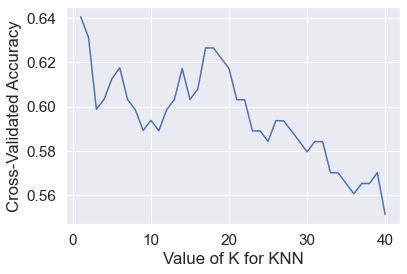

In [62]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# Zoo DataSet

In [120]:
data = pd.read_csv('D:\z Data Science\Assignment\Assignment\Assignment 14\Zoo.csv')
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [121]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [123]:
df = data.drop(data.columns[0], axis=1)

In [124]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [125]:
df.duplicated().sum()

42

In [126]:
df.loc[df.duplicated(), :]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
10,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
20,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
28,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
31,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1


In [127]:
df.drop_duplicates( keep = False, inplace = True)

In [128]:
df.shape

(40, 17)

In [129]:
X = df.drop('type',axis=1).values
y = df['type'].values

In [130]:
X

array([[0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0],
       [0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 4, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 4, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 6, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 1, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 6, 0, 1, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 6, 0, 0, 0],
       [1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 4, 1, 0, 1],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 4, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 1, 0,

In [131]:
y

array([4, 1, 7, 7, 2, 2, 5, 5, 1, 6, 1, 1, 6, 2, 6, 1, 5, 7, 2, 2, 3, 1,
       1, 2, 7, 1, 1, 3, 7, 3, 1, 7, 4, 2, 5, 3, 3, 2, 1, 6], dtype=int64)

In [132]:
# creating training set, test set and checking shapes 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(y_test.shape))

Shape of X_Train:(24, 16)
Shape of y_Train:(24,)
Shape of X_Test:(16, 16)
Shape of y_Test:(16,)


In [133]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

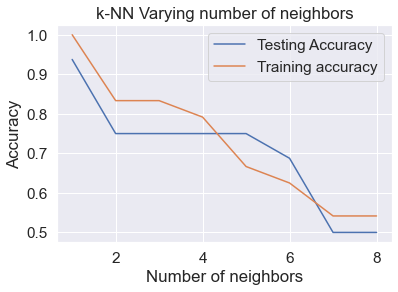

In [134]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k=1. So lets create a KNeighborsClassifier with number of neighbors as 1

In [135]:
knn = KNeighborsClassifier(n_neighbors=1)

In [136]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [137]:
accuracy = knn.score(X_test,y_test) * 100
print("The accuracy is : "+str(accuracy))

The accuracy is : 93.75


In [138]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [139]:
y_pred = knn.predict(X_test)

In [140]:
cnf_matrix=confusion_matrix(y_test,y_pred)
cnf_matrix

array([[4, 0, 0, 0, 0, 0, 0],
       [0, 3, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 2]], dtype=int64)

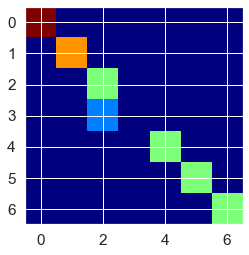

In [141]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
plt.imshow(cnf_matrix,cmap=plt.cm.jet)

<AxesSubplot:>

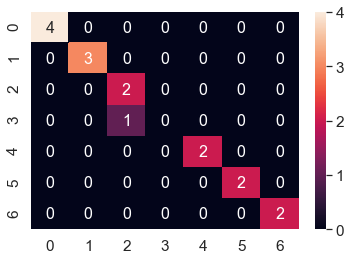

In [144]:
#visualizing the confusion matrix
df_cm = pd.DataFrame(cnf_matrix, range(7),range(7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

Grid Search for Algorithm Tuning

In [147]:
param_grid = {'n_neighbors':np.arange(1,30)}

In [148]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

C:\Users\akshp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [149]:
knn_cv.best_score_ * 100

92.5

In [150]:
knn_cv.best_params_

{'n_neighbors': 1}

C:\Users\akshp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\akshp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\akshp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\akshp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\akshp\anaconda3\lib\site-packages\s

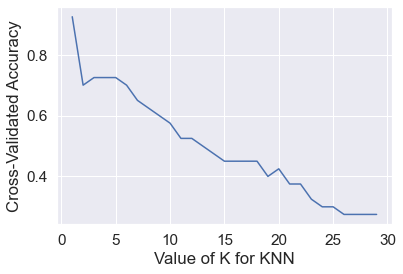

In [152]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 30
k_range = range(1, 30)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()